In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from timeit import timeit

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
mod = KNeighborsClassifier(n_jobs=-1, weights='distance')
mod_scaled = KNeighborsClassifier(n_jobs=-1, weights='distance')
mod_standard_scaled = KNeighborsClassifier(n_jobs=-1, weights='distance')

In [4]:
X_scaled = MinMaxScaler().fit_transform(X)
X_standard_scaled = StandardScaler().fit_transform(X)

In [5]:
def test():
    mod.fit(X, y)

def test_scaled():
    mod_scaled.fit(X_scaled, y)

def test_standard_scaled():
    mod_standard_scaled.fit(X_standard_scaled, y)

In [25]:
n_trials = 10000

In [26]:
timeit(test, number = n_trials)

5.917724138998892

In [27]:
timeit(test_standard_scaled, number = n_trials)

6.141414552002971

In [28]:
timeit(test_scaled, number = n_trials)

5.552045857999474

Note that training time is reduced when scaling with MinMax while the time increases using StandardScaler.

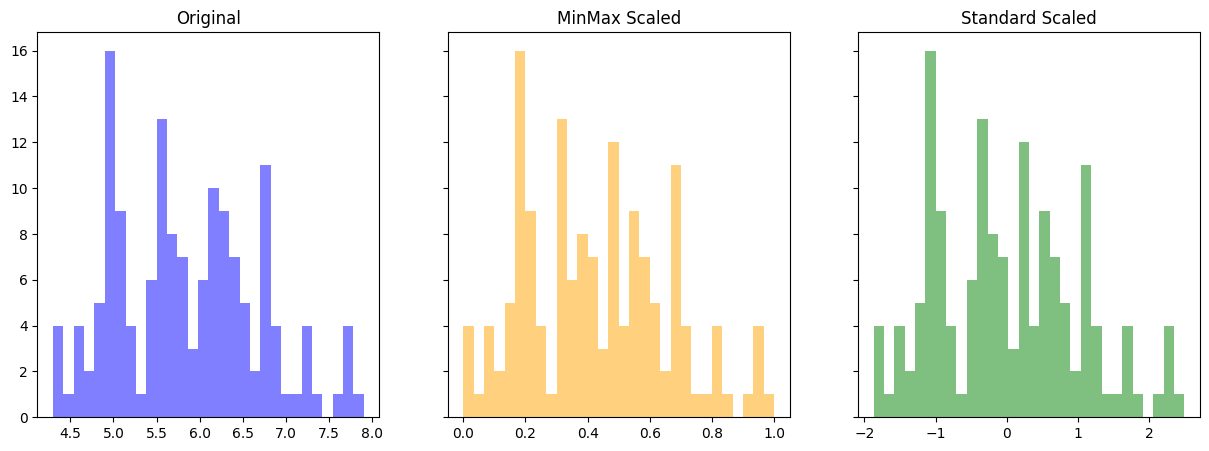

In [17]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
bins = 30

axs[0].hist(X[:,0], bins=bins, alpha=0.5, color='blue')
axs[0].set_title('Original')

axs[1].hist(X_scaled[:,0], bins=bins, alpha=0.5, color='orange')
axs[1].set_title('MinMax Scaled')

axs[2].hist(X_standard_scaled[:,0], bins=bins, alpha=0.5, color='green')
axs[2].set_title('Standard Scaled')

plt.show()

MinMax scaler reduces the order of magnitude of the values, which ends up reducing the magnitud of the calculations needed for the algorythm to converge, while standardScaling doesn't really do much to the magnitude of the values.